#1. Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
repo_url = "https://github.com/dzakialaqsha/autoencoder-benford-analysis.git"
!git clone {repo_url}

Cloning into 'autoencoder-benford-analysis'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 117 (delta 49), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (117/117), 14.31 MiB | 4.65 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [14]:
#import utility functions from repo
%cd "/content/autoencoder-benford-analysis/utils"
import benford_analysis
import model_building

/content/autoencoder-benford-analysis/utils


## 1. Benford's First Digit Analysis

In [4]:
fraud_data = pd.read_csv('/content/autoencoder-benford-analysis/data/fraud_dataset_v1.csv')

In [5]:
fraud_data.head(10)

,WAERS,BUKRS,KTOSL,BELNR,BSCHL,HKONT,DMBTR,WRBTR,label
0,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
5,C1,C15,C6,C68,A1,B2,357627.56,704520.00,regular
6,C4,C47,C2,C28,A2,B3,955576.84,128328.00,regular
7,C1,C19,C1,C17,A1,B1,41769.26,0.00,regular
8,C4,C40,C9,C97,A2,B1,44309.79,0.00,regular
9,C6,C69,C1,C12,A2,B1,466720.45,43843.00,regular


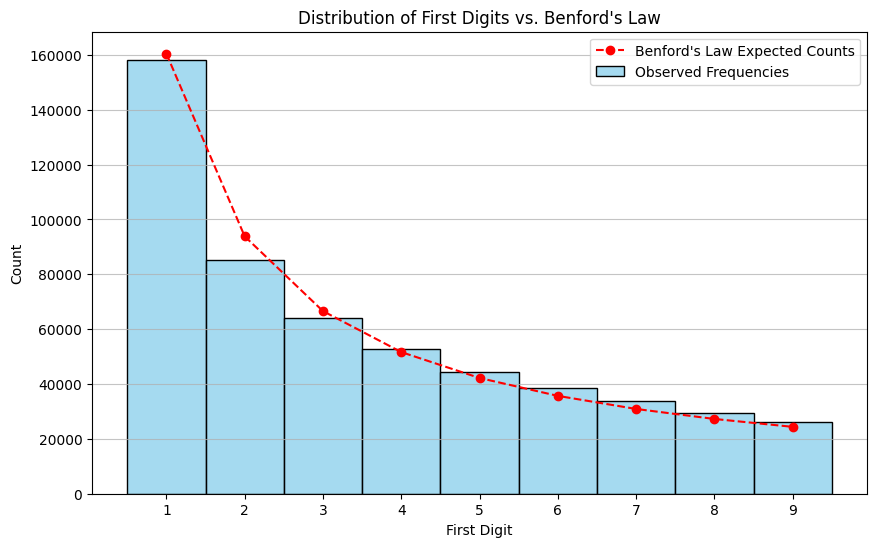

In [6]:
benford_analysis.visualize_benford(dataset=fraud_data, first_digit_column="DMBTR")

In [7]:
benford_analysis.test_benford(dataset=fraud_data, first_digit_column="DMBTR")

(np.float64(0.0054509790089956375), 'Acceptable Conformity')

In [8]:
benford_analysis.classwise_benford(dataset=fraud_data, first_digit_column="DMBTR", target_column="HKONT")

HKONT : B1 | Mean absolute Deviation : 0.0053 | type = Acceptable Conformity
HKONT : B2 | Mean absolute Deviation : 0.0061 | type = Acceptable Conformity
HKONT : B3 | Mean absolute Deviation : 0.0055 | type = Acceptable Conformity
HKONT : Q99 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : Z01 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : K27 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : D68 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : S06 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : L79 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : M13 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : N95 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : K77 | Mean absolute Deviation : 0.2121 | type = Significant Deviation
HKONT : U45 | Mean absolute Deviation : 0.2121 | type = Significant

In [9]:
benford_analysis.classwise_benford(dataset=fraud_data, first_digit_column="DMBTR", target_column="label")

label : regular | Mean absolute Deviation : 0.0054 | type = Acceptable Conformity
label : local | Mean absolute Deviation : 0.2121 | type = Significant Deviation
label : global | Mean absolute Deviation : 0.2121 | type = Significant Deviation


## 3. Granular Anomaly Detection Using Benford's Analysis

In [10]:
prediction_data = fraud_data.copy()
prediction_data = benford_analysis.classwise_benford_table(dataset=prediction_data, first_digit_column='DMBTR', target_column='HKONT')
prediction_data['label'] = prediction_data['label'].isin(['global','local']).astype(int)
prediction_data['benford_label'] = prediction_data['benford_conformity'].isin(['Significant Deviation', 'Acceptable Deviation']).astype(int)
prediction_data.head(25)

,WAERS,BUKRS,KTOSL,BELNR,BSCHL,HKONT,DMBTR,WRBTR,label,benford_conformity,benford_mad,benford_label
0,C3,C31,C9,C92,A3,B1,280979.60,0.00,0,Acceptable Conformity,0.005258,0
1,C1,C18,C7,C76,A1,B2,129856.53,243343.00,0,Acceptable Conformity,0.006079,0
2,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,0,Acceptable Conformity,0.005474,0
3,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,0,Acceptable Conformity,0.005258,0
4,C5,C58,C1,C19,A3,B1,910514.49,346.00,0,Acceptable Conformity,0.005258,0
5,C1,C15,C6,C68,A1,B2,357627.56,704520.00,0,Acceptable Conformity,0.006079,0
6,C4,C47,C2,C28,A2,B3,955576.84,128328.00,0,Acceptable Conformity,0.005474,0
7,C1,C19,C1,C17,A1,B1,41769.26,0.00,0,Acceptable Conformity,0.005258,0
8,C4,C40,C9,C97,A2,B1,44309.79,0.00,0,Acceptable Conformity,0.005258,0
9,C6,C69,C1,C12,A2,B1,466720.45,43843.00,0,Acceptable Conformity,0.005258,0


In [12]:
prediction_data.value_counts('benford_conformity')

,count
benford_conformity,
Acceptable Conformity,532939
Significant Deviation,70


## 4. Model Evaluation

In [15]:
accuracy, precision, recall, f1, confusion_mat = model_building.evaluate_prediction(prediction_data, 'label', 'benford_label')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9999437157721539
Precision: 1.0
Recall: 0.7
F1 Score: 0.8235294117647058
